## Personal Weather Station Evaluation

In [1]:
#### Imports

import sys,os,warnings,math,glob
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from datetime import datetime  
from datetime import timedelta 
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 22})


In [2]:
#### Declarations

stations = ["IWATERLO57", "IWATERLO55", "IKITCHEN16", "IKITCHEN15", "IWOOLWIC7", "IONTARIO1036", "ICAMBRID183"]
my_station = "IWATERLO57"
study_year = 2019
colors = ["black", "blue", "orange", "purple", "cyan", "magenta", "red"]


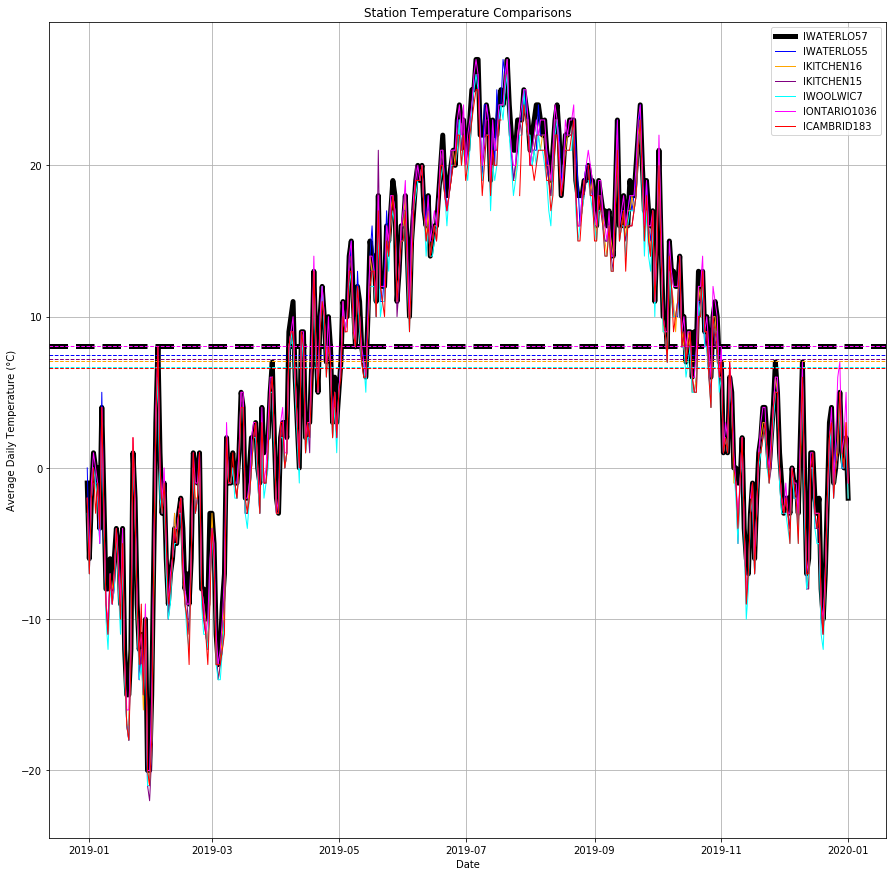

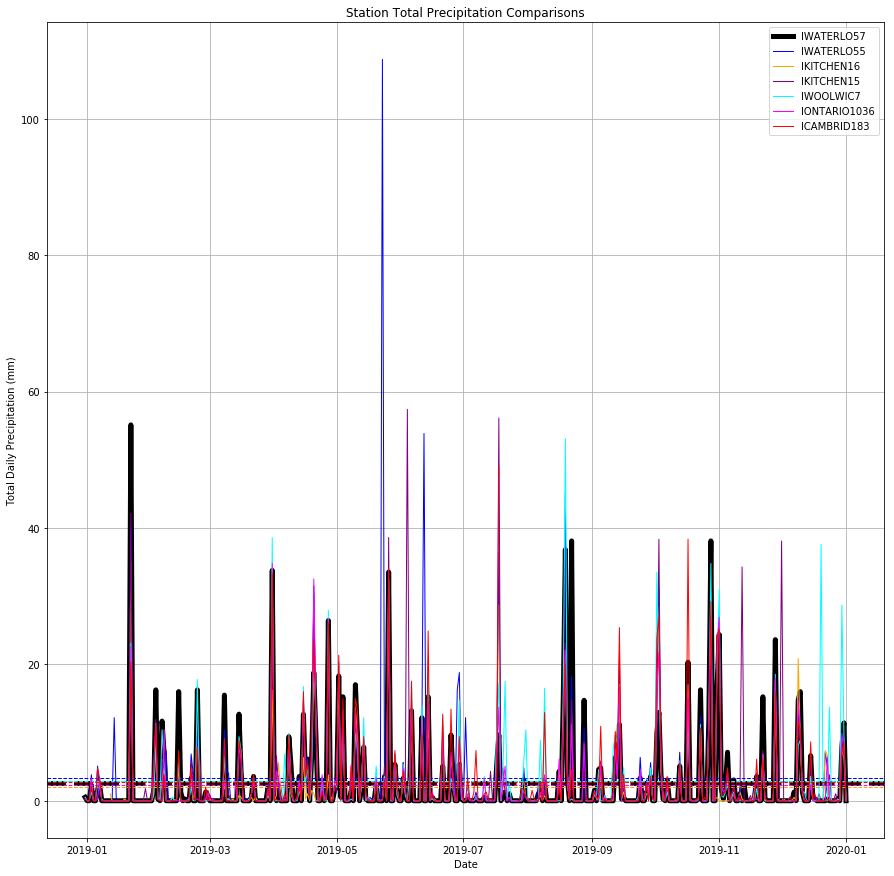

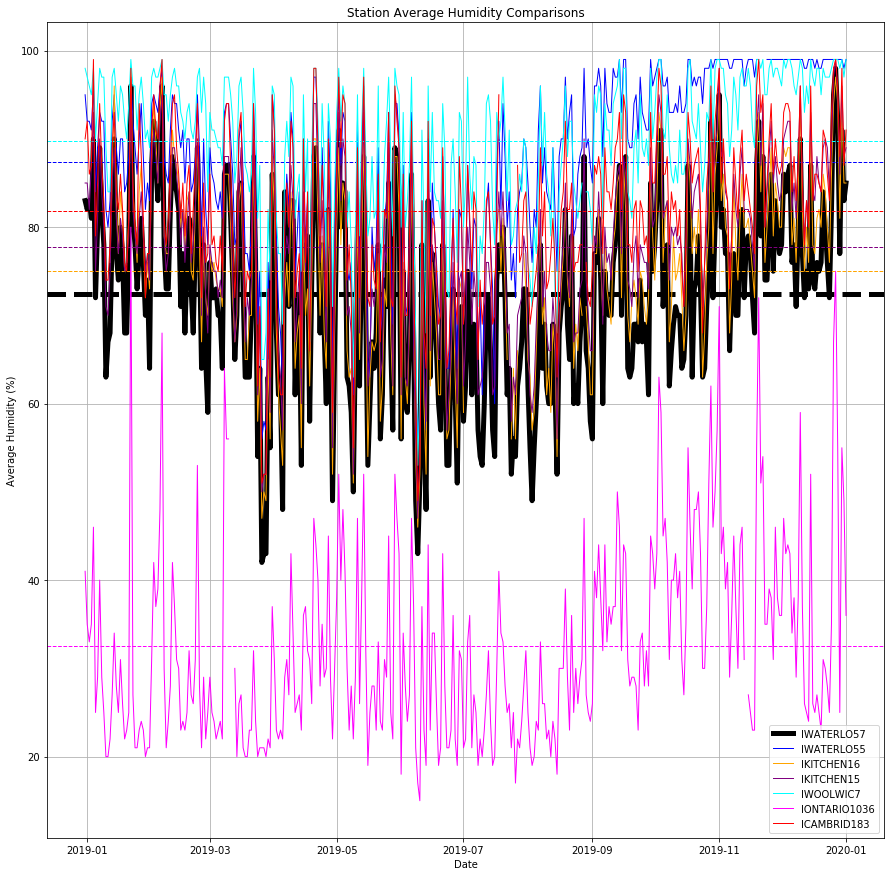

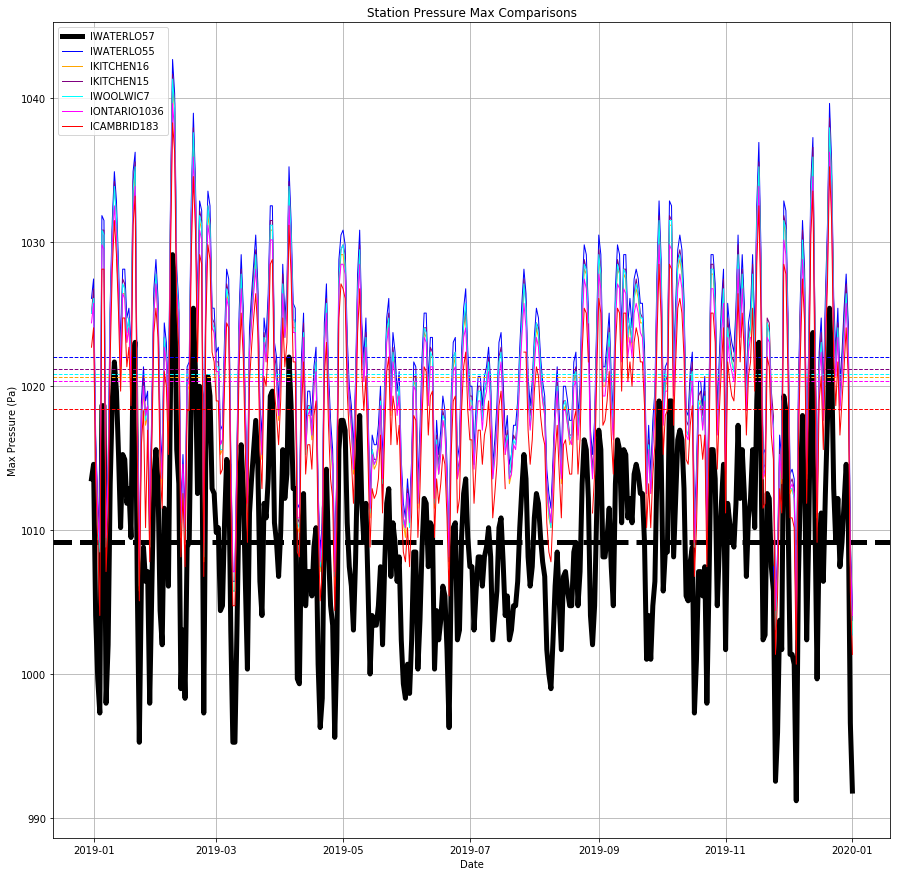

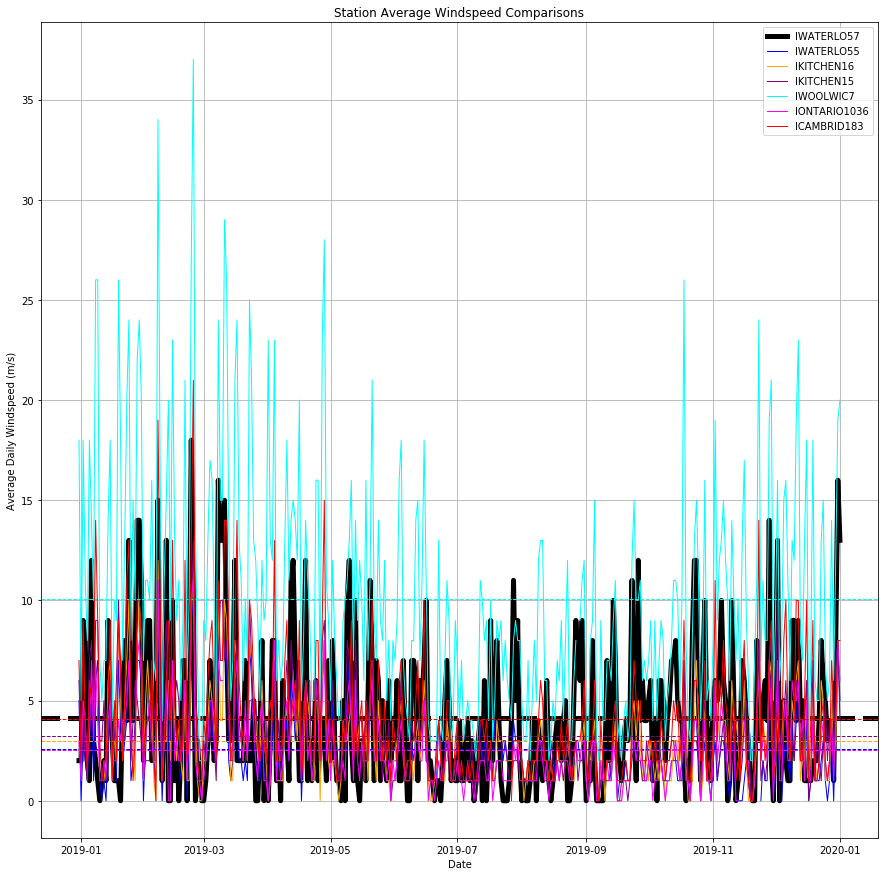

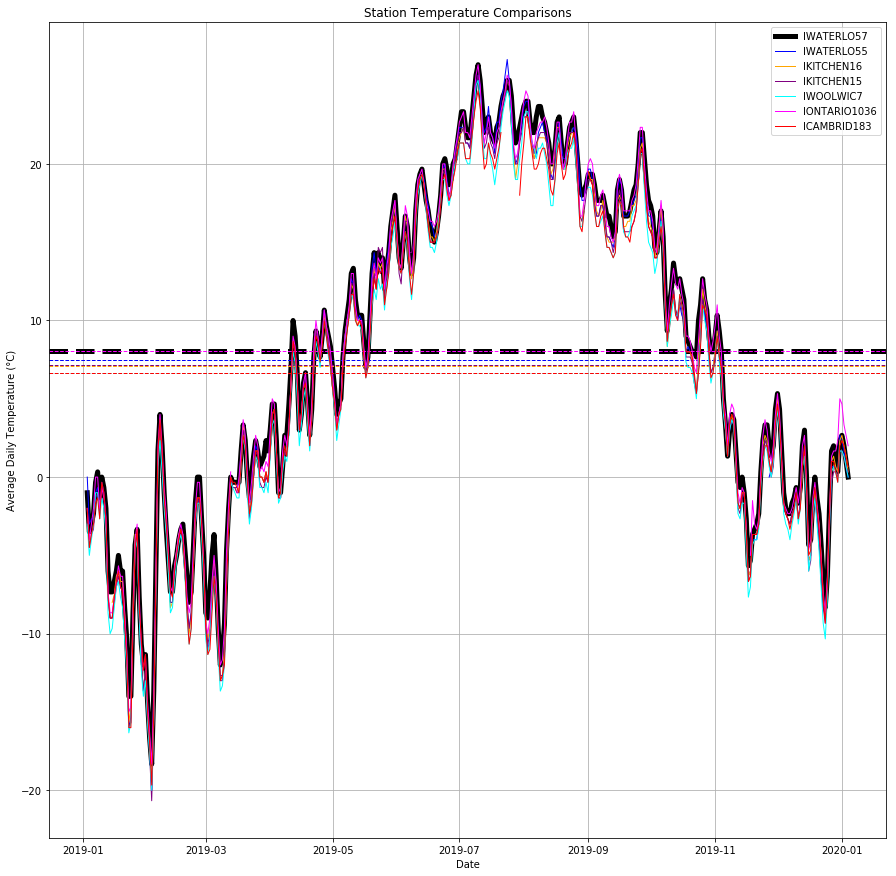

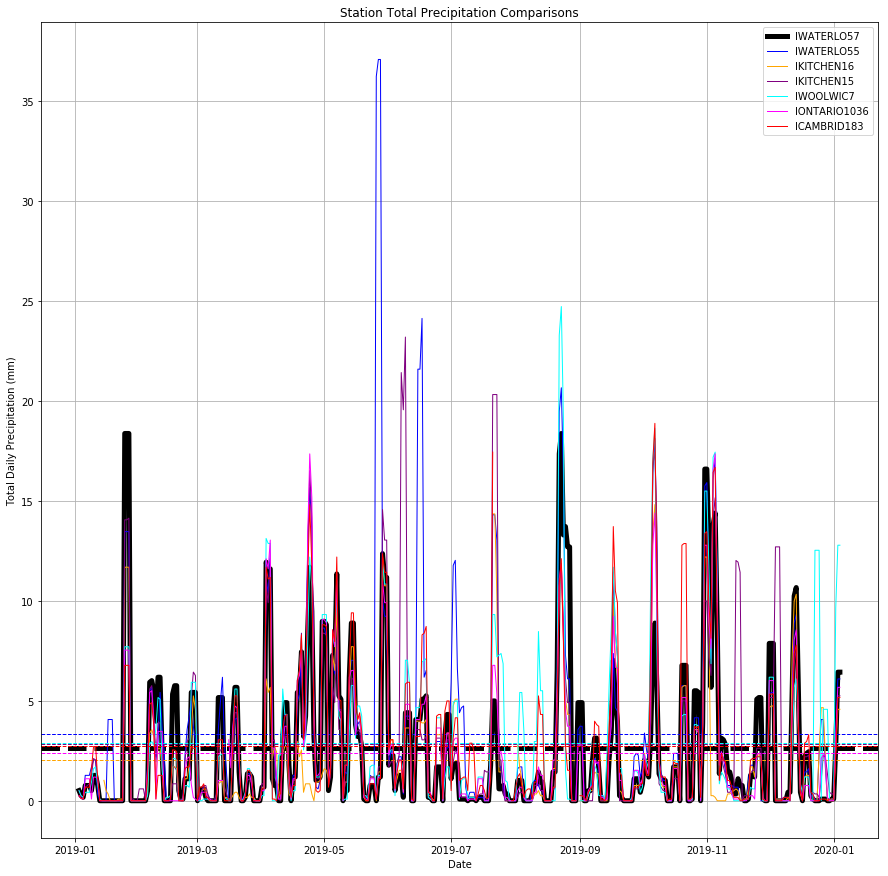

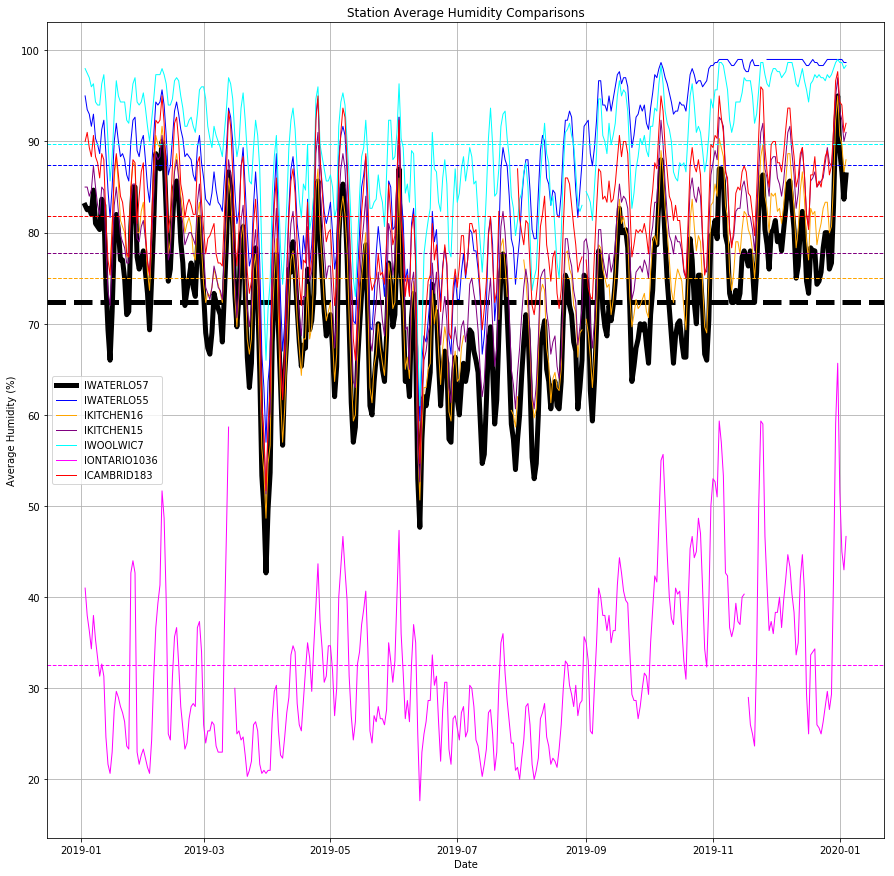

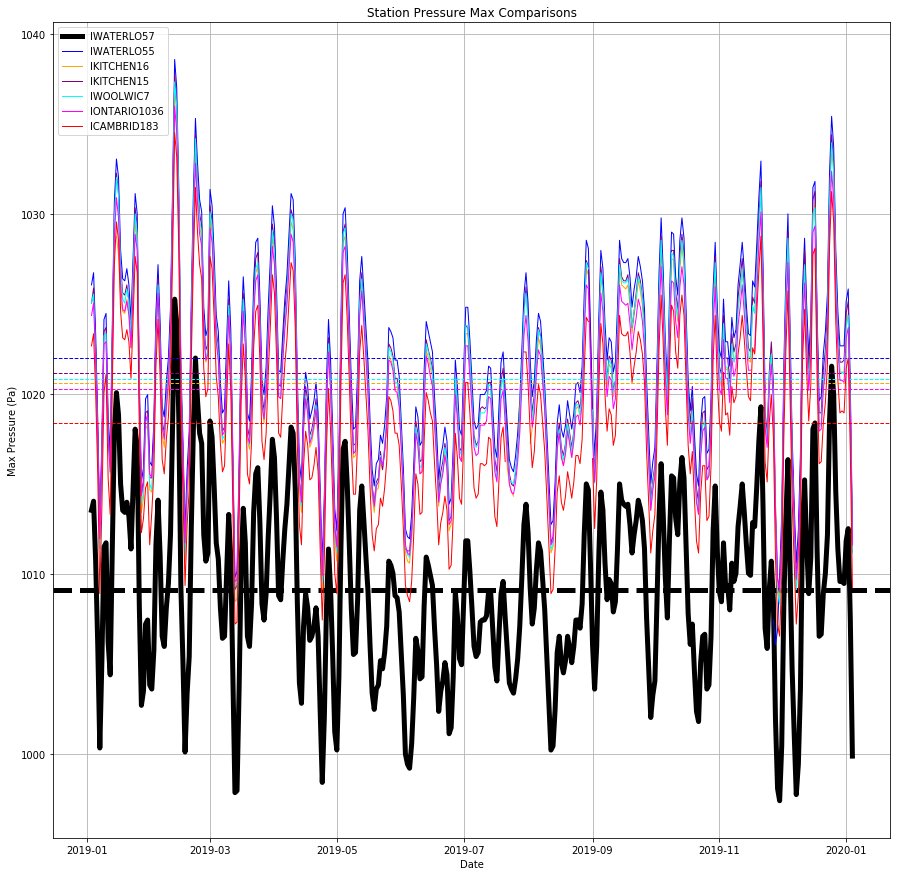

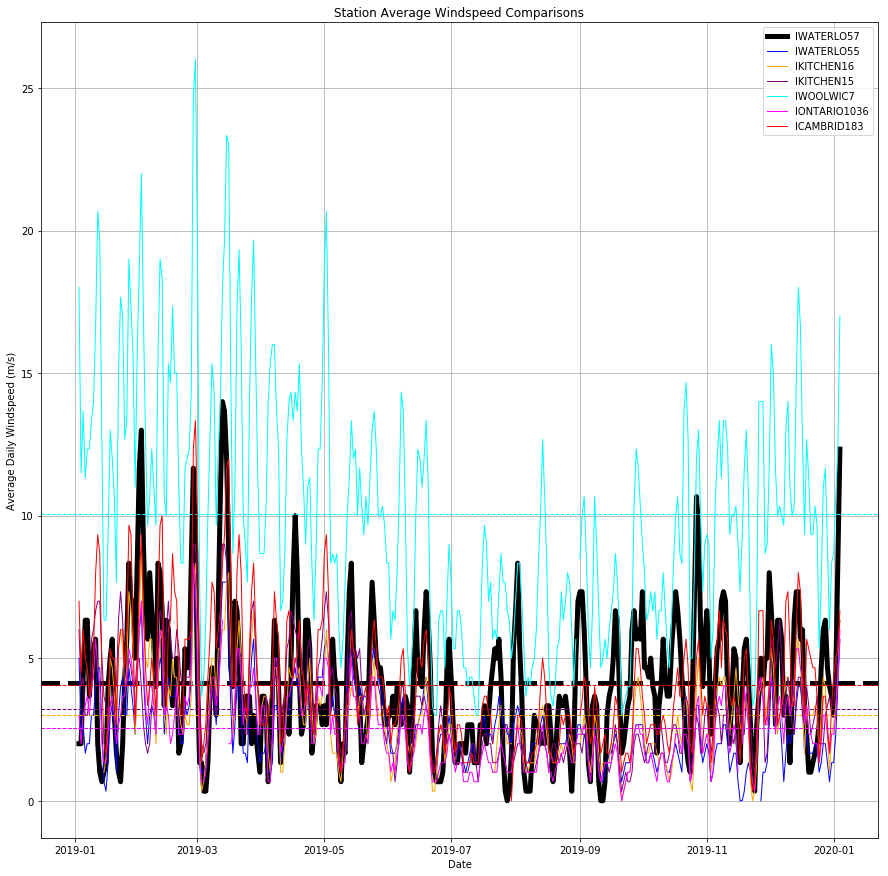

In [31]:
#### Plotting Scripts

# plotClimaticVariable: This function makes a plot of any climatic variable from our station data
def plotClimaticVariable(metric, fig_name, fig_title, fig_xaxis, fig_yaxis, save, moving_avg):
    master_df = pd.DataFrame()
    base_case = True
    
    # Helper function
    def moving_average(a, n=30):
        ret = np.cumsum(a.filled(0))
        ret[n:] = ret[n:] - ret[:-n]
        counts = np.cumsum(~a.mask)
        counts[n:] = counts[n:] - counts[:-n]
        ret[~a.mask] /= counts[~a.mask]
        ret[a.mask] = np.nan
        return ret
    
    # Read in station data
    for station in stations:
        df = pd.DataFrame({station: pd.read_csv(station + "_data.csv")[metric].values})
        if base_case:
            master_df = df
            base_case = False
            continue
        master_df = master_df.join(df)
    
    data = master_df[my_station]
    start_day = 1
    if moving_avg:
        data = moving_average(np.ma.masked_array(master_df[my_station].to_numpy(dtype=np.float64), np.isnan(master_df[my_station].to_numpy(dtype=np.float64))))
        start_day = 31
    
    # Set up x axis (dates)
    day_indices = np.arange(data.shape[0])
    day_of_year = list(map(lambda x: datetime(study_year, 1, start_day) + timedelta(int(x) - 1), day_indices))
    
    # Plot results
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.grid()
    ax.set_title(fig_title)
    ax.set_xlabel(fig_xaxis)
    ax.set_ylabel(fig_yaxis)
    for i, station in enumerate(stations):
        linewidth = 1
        if station == my_station:
            linewidth = 5
        data = master_df[station]
        if moving_avg:
            data = moving_average(np.ma.masked_array(master_df[station].to_numpy(dtype=np.float64), np.isnan(master_df[station].to_numpy(dtype=np.float64))))
        ax.plot(day_of_year, data, label=station, color=colors[i], linewidth=linewidth)
        ax.axhline(np.nanmean(master_df[station]), linestyle="--", color=colors[i], linewidth=linewidth)
    ax.legend()
    if save:
        fig.savefig(figname, transparent=True)

# Run plots
plotClimaticVariable('metric.tempAvg', 'temp_comparisons.png', 'Station Temperature Comparisons', "Date", "Average Daily Temperature (°C)", False, False)
plotClimaticVariable('metric.precipTotal', 'precip_comparisons.png', 'Station Total Precipitation Comparisons', "Date", "Total Daily Precipitation (mm)", False, False)
plotClimaticVariable('humidityAvg', 'humidity_comparisons.png', 'Station Average Humidity Comparisons', "Date", "Average Humidity (%)", False, False)
plotClimaticVariable('metric.pressureMax', 'pressure_comparisons.png', 'Station Pressure Max Comparisons', "Date", "Max Pressure (Pa)", False, False)
plotClimaticVariable('metric.windspeedAvg', 'wind_comparisons.png', 'Station Average Windspeed Comparisons', "Date", "Average Daily Windspeed (m/s)", False, False)

plotClimaticVariable('metric.tempAvg', 'temp_comparisons.png', 'Station Temperature Comparisons', "Date", "Average Daily Temperature (°C)", False, True)
plotClimaticVariable('metric.precipTotal', 'precip_comparisons.png', 'Station Total Precipitation Comparisons', "Date", "Total Daily Precipitation (mm)", False, True)
plotClimaticVariable('humidityAvg', 'humidity_comparisons.png', 'Station Average Humidity Comparisons', "Date", "Average Humidity (%)", False, True)
plotClimaticVariable('metric.pressureMax', 'pressure_comparisons.png', 'Station Pressure Max Comparisons', "Date", "Max Pressure (Pa)", False, True)
plotClimaticVariable('metric.windspeedAvg', 'wind_comparisons.png', 'Station Average Windspeed Comparisons', "Date", "Average Daily Windspeed (m/s)", False, True)

